In [1]:
# Ideas for Fraud check : 
# 1) Check locations of transaction - 2 different transactions in a short period. 
# 2) User's Credit card use history 
# 3) Classifcation on different frauds 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

creditcard.csv



In [3]:
# import data set 
df = pd.read_csv("../input/creditcard.csv")

# Exploring the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check if there is any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# No missing values in the data 

In [7]:
# Creating Train Set, Dev Set & Train set

# Converting the csv data into matrix 
columns = "Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount".split()
X = pd.DataFrame.as_matrix(df,columns=columns)
Y = df.Class
Y = Y.reshape(Y.shape[0],1)
X.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.06)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test,Y_test, test_size=.5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [8]:
# Check if there is Classification Values - 0/1 in training set and other set 

np.where(Y_train == 1)
np.where(Y_test == 1)
np.where(Y_dev == 1)

(array([  24,  509,  618,  964, 2289, 2729, 3266, 3852, 4591, 5601, 7624,
        8101, 8157, 8452]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [9]:
# Checking the shape's of the new data set as matrix 
print("No of training Examples : "+str(X_train.shape[0]))  # 94% data 
print("No of test Examples : "+str(X_test.shape[0]))       # 3% data
print("No of dev Examples : "+str(X_dev.shape[0]))         # 3% data
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))
print("Shape of dev data : "+str(X_dev.shape))
print("Shape of Y test data : "+str(Y_test.shape))
print("Shape of Y dev data : "+str(Y_dev.shape))

No of training Examples : 267718
No of test Examples : 8544
No of dev Examples : 8545
Shape of training data : (267718, 30)
Shape of test data : (8544, 30)
Shape of dev data : (8545, 30)
Shape of Y test data : (8544, 1)
Shape of Y dev data : (8545, 1)


In [10]:
#Flatten the data to so that all Features/X Variables 
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
Y_train_flatten = Y_train.reshape(Y_train.shape[0],-1).T
X_dev_flatten = X_dev.reshape(X_dev.shape[0],-1).T
Y_dev_flatten = Y_dev.reshape(Y_dev.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
Y_test_flatten = Y_test.reshape(Y_test.shape[0],-1).T

print("No of training Examples : "+str(X_train_flatten.shape))  
print("No of test Examples : "+str(Y_train_flatten.shape))  
print("No of X_dev Examples : "+str(X_dev_flatten.shape))  
print("No of Y_dev test Examples : "+str(Y_dev_flatten.shape))  
print("No of X_test Examples : "+str(X_test_flatten.shape))  
print("No of Y_test Examples : "+str(Y_test_flatten.shape))
print("No of Sanity_test : "+str(X_train_flatten[0:5,0]))

No of training Examples : (30, 267718)
No of test Examples : (1, 267718)
No of X_dev Examples : (30, 8545)
No of Y_dev test Examples : (1, 8545)
No of X_test Examples : (30, 8544)
No of Y_test Examples : (1, 8544)
No of Sanity_test : [ 1.54379000e+05  1.84243674e+00  2.83438048e-01 -6.77139216e-01
  3.74157531e+00]


In [11]:
# Normalize features and create final Train set 
X_train_set = preprocessing.normalize(X_train_flatten)
Y_train_set = Y_train_flatten

print("No of X_train_set shape : "+str(X_train_set.shape))  
print("No of Y_train_set shape : "+str(Y_train_set.shape)) 

No of X_train_set shape : (30, 267718)
No of Y_train_set shape : (1, 267718)


In [12]:
# Funcation to intialize weights for forward propogration 
def intialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b'+str(l)] = np.zeros((layer_dims[l],1))
            
    return parameters

In [13]:
# Testing if the function works 
parameters = intialize_parameters([30,20,10,5,2])
print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 =" + str(parameters["W2"]))
print("b2 =" + str(parameters["b2"]))
print("W3 =" + str(parameters["W3"]))
print("b3 =" + str(parameters["b3"]))
print("W4 =" + str(parameters["W4"]))
print("b4 =" + str(parameters["b4"]))

W1 =[[ 5.82746677e-03 -6.72815223e-03  2.71865351e-03 -7.84429385e-03
  -9.12317865e-04  1.18803987e-02  6.47977349e-03 -5.73435574e-04
   1.41947203e-02 -3.51833272e-03 -7.15683862e-03  1.38850554e-02
   1.63785433e-02 -6.82729727e-03  2.93159900e-03 -3.48869137e-03
   6.30933985e-03 -1.01223221e-02  5.66738535e-03 -7.80590225e-03
  -1.43414457e-02 -9.81037240e-03 -1.76363351e-03  7.85391488e-03
  -1.27744952e-02  1.53227892e-02  1.92357424e-03 -1.08104913e-02
  -1.16257579e-03 -7.61112735e-03]
 [ 5.42164872e-03  2.49167332e-03 -3.10549039e-03 -4.53899084e-03
  -3.18098385e-03 -5.10755476e-03 -4.83802693e-03 -1.05063555e-02
  -2.92711152e-03 -5.20777009e-03  3.45108527e-03  2.02873357e-03
  -8.53742275e-03  4.13848169e-03  9.00178025e-03 -9.52728225e-03
  -1.03989331e-02  1.21488691e-03 -7.89317596e-03  1.18804793e-02
   4.00370627e-04  8.24657099e-04  2.43445251e-03 -5.71063153e-03
  -3.95560836e-03 -7.59215936e-03  5.93918252e-03  7.83932590e-03
  -6.36164540e-04  1.04014732e-02]
 [

In [14]:
# create the sigmoid function 
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    cache = z
    return s,cache

In [15]:
# test sigmoid function 
sigmoid(np.array(([2,7]))) 

(array([0.88079708, 0.99908895]), array([2, 7]))

In [16]:
# create the relu function
def relu(z):
    
    r = np.maximum(0,z)
    cache = z
    return r,cache
        


In [17]:
# testing relu function 
relu([1,-1,21]) 

(array([ 1,  0, 21]), [1, -1, 21])

In [18]:
# Relu Backward and Sigmoid Backward
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [19]:
# Linear_forward
def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

In [20]:
#linear_activation_forward
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [21]:
# L layers forward propagation 

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A, cache = linear_activation_forward(A,parameters["W" + str(l)],parameters["b" + str(l)],activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters["W" + str(L)],parameters["b" + str(L)],activation="sigmoid")
    caches.append(cache)
            
    return AL, caches


In [22]:
#  Cost function

def cost_function(AL, Y):
    m = Y.shape[1]

    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

In [23]:
# linear_backward 

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [24]:
# linear_activation_backward

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [25]:
# backward propagation

def backward_propagation(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+2)],current_cache,activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [26]:
# update parameters 

def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(1,L+1):
        parameters["W"+str(l)]=parameters["W" + str(l)]-learning_rate*grads["dW" + str(l)]
        parameters["b"+str(l)]=parameters["b" + str(l)]-learning_rate*grads["db" + str(l)]
    return parameters


In [27]:
# setting the size of the network 
layer_dims = [30,20,10,5,1] #5 Layer model with 3 hidden layers 

# Deep Learning network to classify frauds and normal
layer_dims = [30,20,10,5,1] #5 Layer model with 3 hidden layers 

# Deep Learning network to classify frauds and normal
def nn_model(X,Y,layer_dims,learning_rate=.0065, num_iterations=2500,print_cost=False):
    costs = []
    
    #initialize parameters 
    parameters = intialize_parameters(layer_dims)
    # for loop for iterations/epoch 
    for i in range(0,num_iterations):
        #forward_propagation
        AL, caches = forward_propagation(X, parameters)
        
        #compute cost
        cost = cost_function(AL, Y)
        
        #backward_propagation 
        grads = backward_propagation(AL, Y, caches)
        
        #update parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [28]:
X_train_set.shape
Y_train_set.shape

(1, 267718)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.555187
Cost after iteration 200: 0.454774
Cost after iteration 300: 0.380509
Cost after iteration 400: 0.324462
Cost after iteration 500: 0.281266
Cost after iteration 600: 0.247295
Cost after iteration 700: 0.220081
Cost after iteration 800: 0.197911
Cost after iteration 900: 0.179580
Cost after iteration 1000: 0.164220
Cost after iteration 1100: 0.151197
Cost after iteration 1200: 0.140038
Cost after iteration 1300: 0.130386
Cost after iteration 1400: 0.121967
Cost after iteration 1500: 0.114568
Cost after iteration 1600: 0.108019
Cost after iteration 1700: 0.102188
Cost after iteration 1800: 0.096966
Cost after iteration 1900: 0.092265
Cost after iteration 2000: 0.088014
Cost after iteration 2100: 0.084152
Cost after iteration 2200: 0.080630
Cost after iteration 2300: 0.077406
Cost after iteration 2400: 0.074445


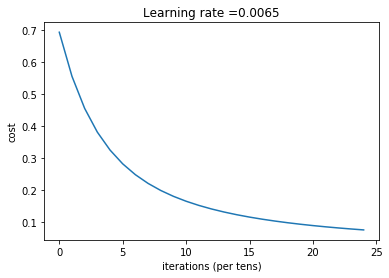

In [29]:
# running a model 
parameters = nn_model(X_train_set,Y_train_set,layer_dims,learning_rate=.0065,num_iterations = 2500, print_cost = True)

In [30]:
# predict Function
def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [31]:
pred_train = predict(X_train_set, Y_train_set, parameters)

Accuracy: 0.9982593624634881


In [32]:
pred_test = predict(X_test_flatten, Y_test_flatten, parameters)

Accuracy: 0.9985955056179777


In [33]:
pred_dev = predict(X_dev_flatten, Y_dev_flatten, parameters)

Accuracy: 0.99836161497952
